<a href="https://colab.research.google.com/github/Akramkhan01/Email-Campaign-Effectiveness-Prediction-Capstone-Project/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction**

# **Problem Statement**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In [2]:
#Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Path of data in drive
data_path='/content/drive/MyDrive/Email Campaign Effectiveness Prediction - Akram Khan/data_email_campaign.csv'
#Reading csv file
email_data=pd.read_csv(data_path)

In [5]:
#Data
email_data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [6]:
#Data
email_data.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [31]:
email_data.shape

(68353, 12)

In [7]:
#Data
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


# **Handling Missing Data**

In [29]:
#missing values in our dataset
missing = pd.DataFrame([email_data.isnull().sum(),email_data.isnull().sum()*100.0/email_data.shape[0]]).T
missing.columns = ['No. of Missing Data', '% Missing Data']
missing


,No. of Missing Data,% Missing Data
Email_ID,0.0,0.000000
Email_Type,0.0,0.000000
Subject_Hotness_Score,0.0,0.000000
Email_Source_Type,0.0,0.000000
Customer_Location,11595.0,16.963411
Email_Campaign_Type,0.0,0.000000
Total_Past_Communications,6825.0,9.984931
Time_Email_sent_Category,0.0,0.000000
Word_Count,0.0,0.000000
Total_Links,2201.0,3.220049


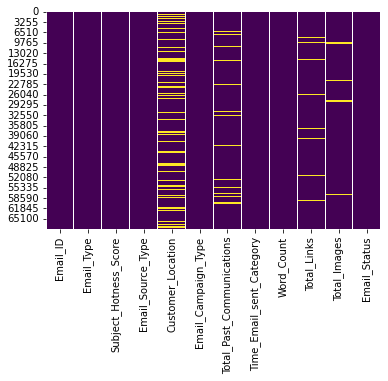

In [9]:
# Visualizing the missing values
sns.heatmap(email_data.isnull(),cbar=False,cmap='viridis')

In [12]:
# Check for duplicates

duplicate_df = email_data[email_data.duplicated()]
duplicate_df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status


# **We dont have any duplicate records**

In [13]:
email_data.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


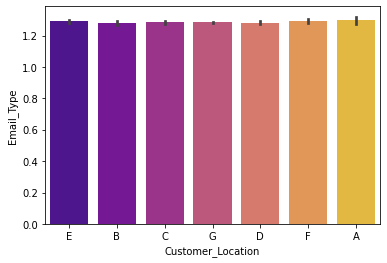

In [16]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Type', data = email_data, 
            palette ='plasma')

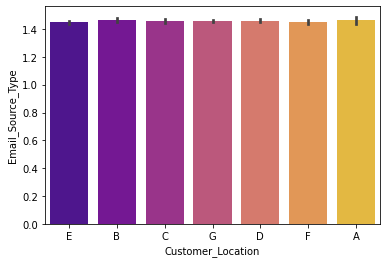

In [18]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Source_Type', data = email_data, 
            palette ='plasma')

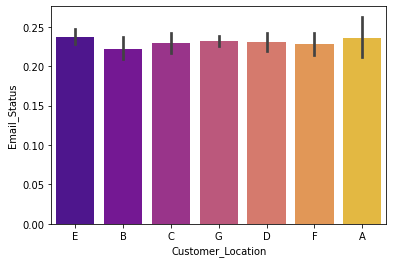

In [19]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Status', data = email_data, 
            palette ='plasma')

In [ ]:
# import the seaborn library
import seaborn as sns
 
 
# change the estimator from mean to
# standard deviation
sns.barplot(x ='Customer_Location', y ='Email_Status', data = email_data, 
            palette ='plasma')

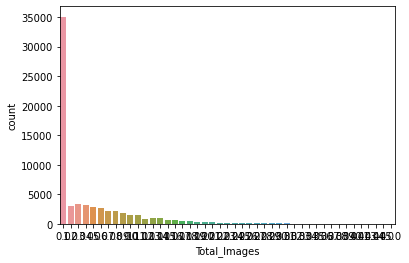

In [21]:
sns.countplot(x ='Total_Images', data = email_data)

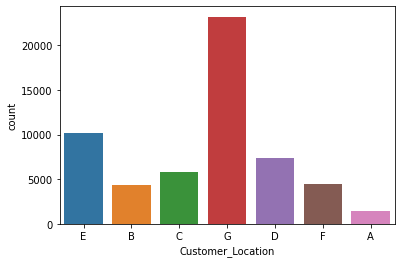

In [25]:
#Visualizing Customer_Location
sns.countplot(email_data['Customer_Location'])

In [24]:
email_data['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64